# Introduction to Numpy powered by oneAPI



# Exercises:

Do a page search for each **Exercise** in this notebook. Complete all  exercises. Code in cells above each exercise may give insight into a solid approach

In [ ]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Matrix Multiplication

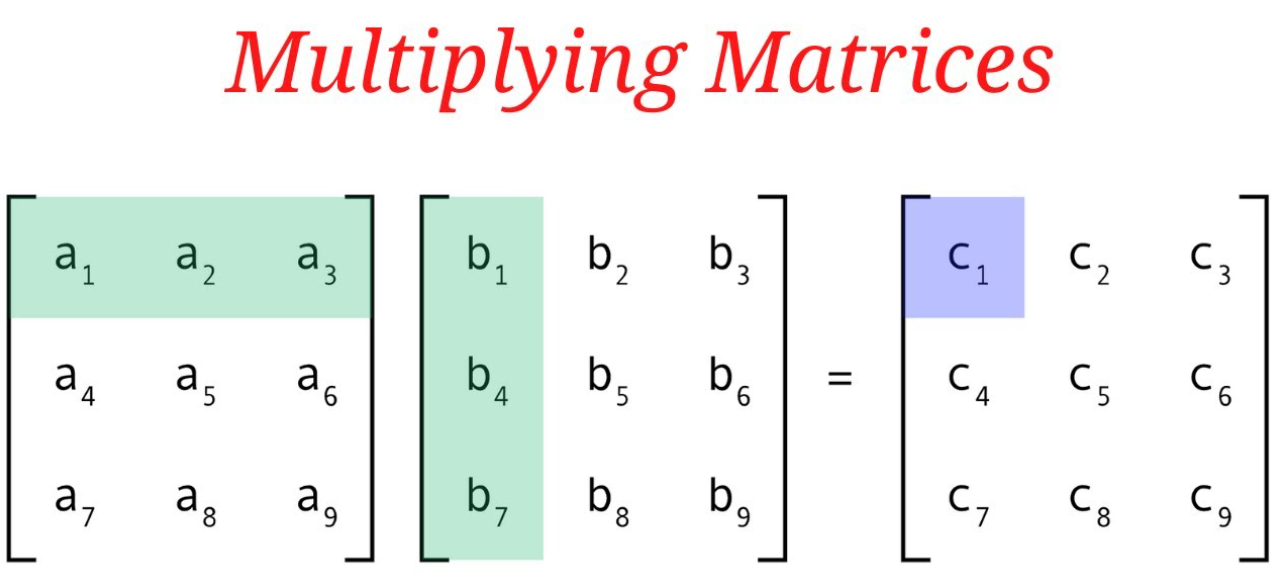

Compare methods of multiplying matrices

Spoiler alert: If **loops are bad** for performance, **triply nested loops** are **WORSE!**

## Naive triply nested loop
Below is the naive triply nexted loop code to multiply two arrays in python

In [ ]:
import numpy as np
import time

N = 500
a = np.random.rand(N, N)
b = np.random.rand(N, N)

speed = {}

t1=time.time()
N = a.shape[0]
c = np.zeros_like(a)
for i in range(N):
    for k in range(N):
        for j in range(N):
            c[i,j] += a[i,k] * b[k,j]
t2=time.time()
print("Matrix Mult Triply Nested Loop: {} secs".format(t2-t1))
speed['Triply Nested'] = t2-t1
c

## *Numpy.dot* method to multiply arrays

Compare this to one Numpy way to do the same task: numpy.dot

In [ ]:
# np.multiply exiplictly with numpy ufunc
t1=time.time()

c = np.dot(a,b)

t2=time.time()
print("With np.dot(a.T,b): {} secs".format(t2-t1))
speed['np.dot(a.T,b)'] = t2-t1
c

## *Numpy.matmul* to multiply arrays

We will compare the timing in a plot later

In [ ]:
# np.multiply exiplictly with numpy ufunc
t1=time.time()

c = np.matmul(a,b)

t2=time.time()
print("With np.matmul(a,b): {} secs".format(t2-t1))
speed['np.matmul(a,b)'] = t2-t1
c

## Try Scipy version Matrix Multiply

see
https://scipy.github.io/old-wiki/pages/PerformanceTips

Seems to be slower than numpy dot. But it is worth checking a couple libraries since we are going the rescue

In [ ]:
# try using numpy dot product

import scipy.linalg.blas as LA
t1 = time.time()
B = LA.sgemm(alpha=1.0, a= a, b= b )
#B = LA.dgemm(alpha=1.0, a= A[:,:,0], b= A[:,:,0], trans_a= False)
t2 = time.time()
print(t2-t1, "[s]")
speed['Scipy LA'] = t2-t1
B

In [ ]:
import matplotlib.pyplot as plt

timing = list(speed.values())
algo = list(speed.keys())

plt.figure(figsize=(10,6))
plt.title("Time taken to multiply {}x{} records in seconds".format(N,N),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.xticks(rotation=-60)
bars = [i+1 for i in range(len(speed))]
print(bars) 
timing = [v for v in speed.values()]
print(timing)
algos = [v for v in speed.keys()]
print(algos)
plt.bar(x = bars, height= timing, align='center',tick_label= algos)
speedup = timing[0]/min(timing)

print("speedup {:,} X".format(int(np.round(speedup))))


It is very often a great idea to replace your custom loops with loops that other people have already analyzed and optimized. Matrix multiplication is a great example fo something that has been optimized very thoroughly - so find a fast version and use it. Like Numpy

In [ ]:
print("Done")